<a href="https://colab.research.google.com/github/JosharaPalacios/LaboratorioSe-ales4/blob/main/Laboratorio_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LABORATORIO 4

## PARTE A

Mounted at /content/drive


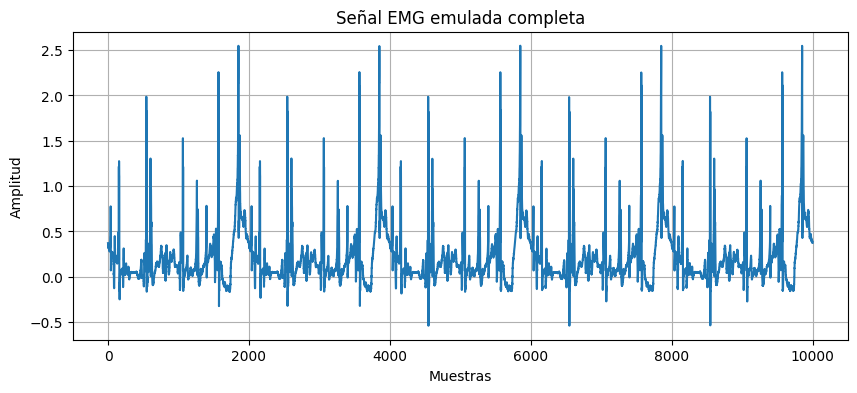

,Contracción,Frecuencia media (Hz),Frecuencia mediana (Hz)
0,1,84.906730,33.203125
1,2,87.068614,34.179688
2,3,89.967411,35.156250
3,4,91.345596,35.156250
4,5,91.414588,35.156250


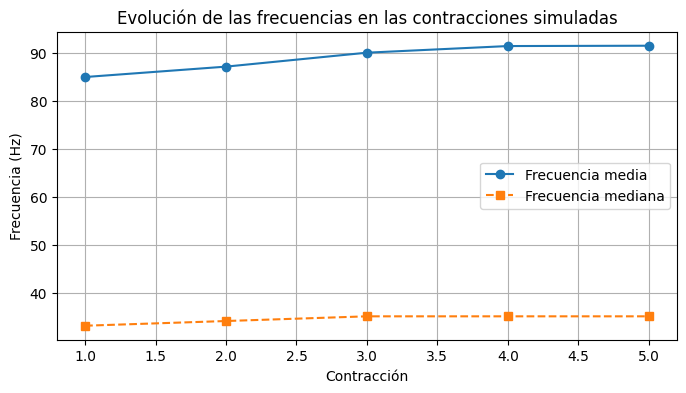

Análisis:
La frecuencia media representa el centro de energía del espectro de la señal EMG.
La frecuencia mediana indica el punto donde se acumula el 50% de la potencia total.
Comparando las contracciones, se puede observar si hay fatiga o cambios en el reclutamiento muscular.


In [ ]:

# Conectar con Google Drive
from google.colab import drive
drive.mount('/content/drive')
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import welch

ruta = '/content/drive/MyDrive/GITTHUB/Captura_Lab4.txt'


senal = np.loadtxt(ruta)



# Visualizar la señal completa
plt.figure(figsize=(10,4))
plt.plot(senal)
plt.title('Señal EMG emulada completa')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.grid(True)
plt.show()

# Segmentar la señal en 5 contracciones simuladas
segmentos = np.array_split(senal, 5)

# Calcular frecuencia media y mediana de cada contracción
fs = 1000  # frecuencia de muestreo en Hz (ajusta según tu caso)
resultados = []

for i, seg in enumerate(segmentos, start=1):
    f, Pxx = welch(seg, fs=fs, nperseg=1024)
    f_media = np.sum(f * Pxx) / np.sum(Pxx)

    # Frecuencia mediana = donde se acumula el 50% de la energía
    energia_acum = np.cumsum(Pxx)
    f_mediana = f[np.where(energia_acum >= energia_acum[-1]/2)[0][0]]

    resultados.append([i, f_media, f_mediana])

# Crear tabla con resultados
tabla = pd.DataFrame(resultados, columns=['Contracción', 'Frecuencia media (Hz)', 'Frecuencia mediana (Hz)'])
display(tabla)

# Graficar evolución de las frecuencias
plt.figure(figsize=(8,4))
plt.plot(tabla['Contracción'], tabla['Frecuencia media (Hz)'], 'o-', label='Frecuencia media')
plt.plot(tabla['Contracción'], tabla['Frecuencia mediana (Hz)'], 's--', label='Frecuencia mediana')
plt.title('Evolución de las frecuencias en las contracciones simuladas')
plt.xlabel('Contracción')
plt.ylabel('Frecuencia (Hz)')
plt.legend()
plt.grid(True)
plt.show()

# Análisis simple
print("Análisis:")
print("La frecuencia media representa el centro de energía del espectro de la señal EMG.")
print("La frecuencia mediana indica el punto donde se acumula el 50% de la potencia total.")
print("Comparando las contracciones, se puede observar si hay fatiga o cambios en el reclutamiento muscular.")


## PARTE B


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Frecuencia de muestreo estimada: 10000.0 Hz


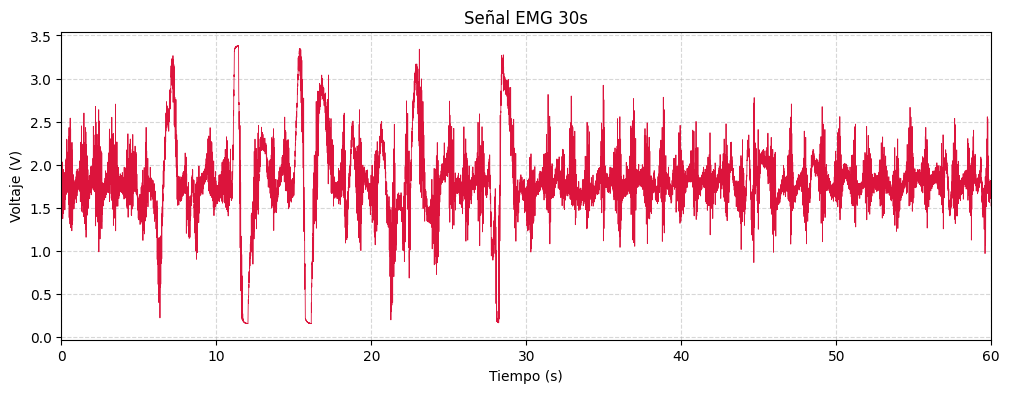

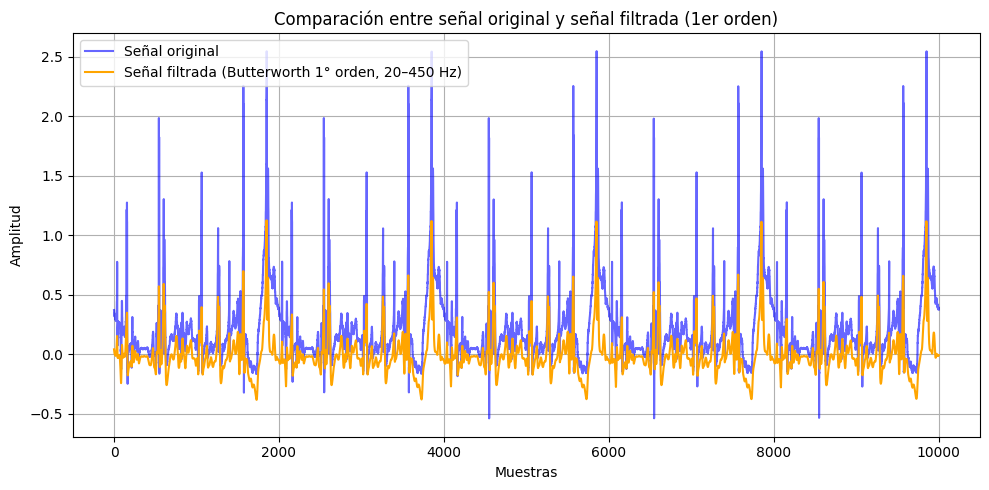

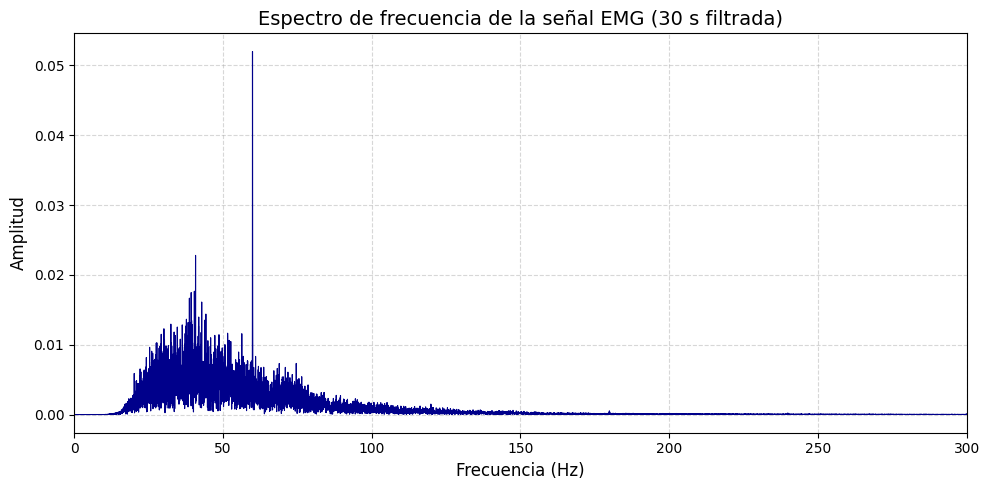

,Contracción,Frecuencia media (Hz),Frecuencia mediana (Hz)
0,1,47.541285,48.828125
1,2,45.964015,48.828125
2,3,46.245413,39.062500
3,4,45.220537,39.062500
4,5,47.419021,48.828125


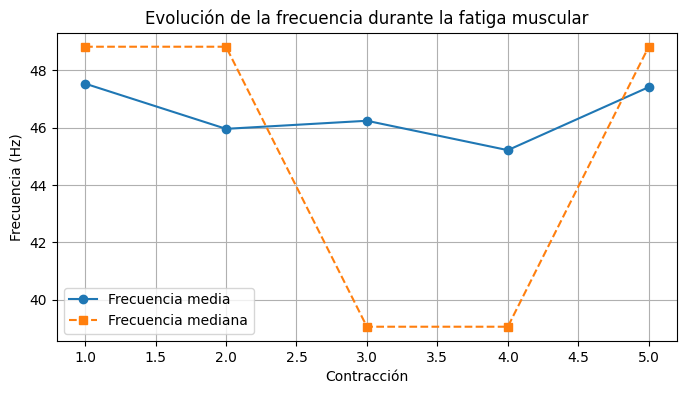

Análisis:
La disminución progresiva de la frecuencia media y mediana indica el inicio de la fatiga muscular,
debido a la reducción en la velocidad de conducción de las fibras musculares activas.


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.signal import butter, filtfilt, welch


ruta = '/content/drive/MyDrive/GITTHUB/Captura_1_REAL.txt'

data = np.loadtxt(ruta, skiprows=1)
tiempo = data[:, 0]
voltaje = data[:, 1]

# Calcular frecuencia de muestreo
fs = 1 / (tiempo[1] - tiempo[0])
print(f"Frecuencia de muestreo estimada: {fs:.1f} Hz")

# Graficar señal original

plt.figure(figsize=(12, 4))
plt.plot(tiempo, voltaje, color='crimson', linewidth=0.6)
plt.title("Señal EMG 30s")
plt.xlabel("Tiempo (s)")
plt.ylabel("Voltaje (V)")
plt.xlim(0, 60)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# === Filtro pasa banda Butterworth (20–450 Hz) de 1er orden y comparación visual ===
from scipy.signal import butter, filtfilt
import matplotlib.pyplot as plt

# Parámetros del filtro
fs = 10000      # Frecuencia de muestreo en Hz
lowcut = 20     # Frecuencia mínima (Hz)
highcut = 450   # Frecuencia máxima (Hz)
order = 1       # 🔹 Filtro Butterworth de primer orden (transición más suave)

# Diseño del filtro pasa banda
nyquist = 0.5 * fs
low = lowcut / nyquist
high = highcut / nyquist
b, a = butter(order, [low, high], btype='band')

# Aplicar el filtro a la señal original
senal_filtrada = filtfilt(b, a, senal)

# Seleccionar primeros 30 segundos
mask_30s = tiempo <= 30
tiempo_30s = tiempo[mask_30s]
voltaje_30s = voltaje[mask_30s]

# === Visualizar señal original y filtrada superpuestas ===
plt.figure(figsize=(10,5))
plt.plot(senal, label='Señal original', alpha=0.6, color='blue')
plt.plot(senal_filtrada, label='Señal filtrada (Butterworth 1° orden, 20–450 Hz)', color='orange')
plt.title('Comparación entre señal original y señal filtrada (1er orden)')
plt.xlabel('Muestras')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



import numpy as np
import matplotlib.pyplot as plt

import numpy as np

# Calcular FFT de la señal filtrada (30 s)
n = len(voltaje_filtrado)
fft_vals = np.fft.fft(voltaje_filtrado)
fft_freq = np.fft.fftfreq(n, d=1/fs)

# Tomar solo la mitad positiva del espectro
mask = fft_freq > 0
fft_freq = fft_freq[mask]
fft_magnitude = np.abs(fft_vals[mask]) * (2 / n)  # normalización

# Graficar espectro de frecuencias
plt.figure(figsize=(10, 5))
plt.plot(fft_freq, fft_magnitude, color='darkblue', linewidth=0.8)
plt.title("Espectro de frecuencia de la señal EMG (30 s filtrada)", fontsize=14)
plt.xlabel("Frecuencia (Hz)", fontsize=12)
plt.ylabel("Amplitud", fontsize=12)
plt.xlim(0, 300)  # rango de interés para EMG
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()








# Segmentar la señal
segmentos = np.array_split(voltaje_filtrado, 5)

# Calcular frecuencia media y mediana de cada contracción
resultados = []
for i, seg in enumerate(segmentos, start=1):
    f, Pxx = welch(seg, fs=fs, nperseg=1024)
    f_media = np.sum(f * Pxx) / np.sum(Pxx)
    energia_acum = np.cumsum(Pxx)
    f_mediana = f[np.where(energia_acum >= energia_acum[-1]/2)[0][0]]
    resultados.append([i, f_media, f_mediana])

tabla = pd.DataFrame(resultados, columns=['Contracción', 'Frecuencia media (Hz)', 'Frecuencia mediana (Hz)'])
display(tabla)

# Graficar evolución de las frecuencias
plt.figure(figsize=(8,4))
plt.plot(tabla['Contracción'], tabla['Frecuencia media (Hz)'], 'o-', label='Frecuencia media')
plt.plot(tabla['Contracción'], tabla['Frecuencia mediana (Hz)'], 's--', label='Frecuencia mediana')
plt.title("Evolución de la frecuencia durante la fatiga muscular")
plt.xlabel("Contracción")
plt.ylabel("Frecuencia (Hz)")
plt.legend()
plt.grid(True)
plt.show()

# Análisis
print("Análisis:")
print("La disminución progresiva de la frecuencia media y mediana indica el inicio de la fatiga muscular,")
print("debido a la reducción en la velocidad de conducción de las fibras musculares activas.")



## PARTE C

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Frecuencia de muestreo estimada: 10000.0 Hz
Segments: 460 (longitudes min/max = 652 / 653)


,Contracción,Frecuencia_media_Hz,Frecuencia_mediana_Hz,Frecuencia_pico_Hz,Ratio_potencia_>200Hz
0,1,47.520810,45.941807,61.255743,0.000082
1,2,45.855413,45.941807,30.627871,0.000040
2,3,32.735130,30.627871,30.627871,0.000276
3,4,48.829562,45.941807,45.941807,0.000073
4,5,35.492053,30.627871,30.627871,0.000096
5,6,60.134376,61.255743,76.569678,0.000258
6,7,40.136117,45.941807,45.941807,0.000240
7,8,53.438502,61.255743,61.255743,0.000043
8,9,38.396617,30.627871,30.627871,0.000070
9,10,48.694653,45.941807,45.941807,0.000095


Resultados guardados en: /content/drive/MyDrive/GITTHUB/resultados_fft_460.csv


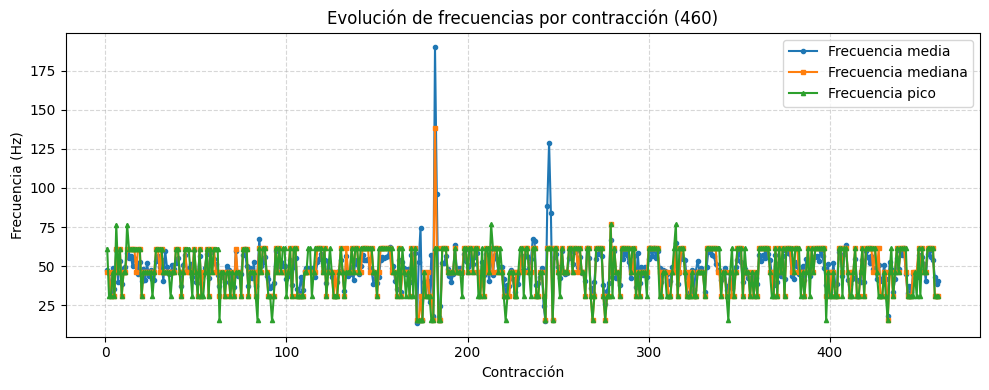

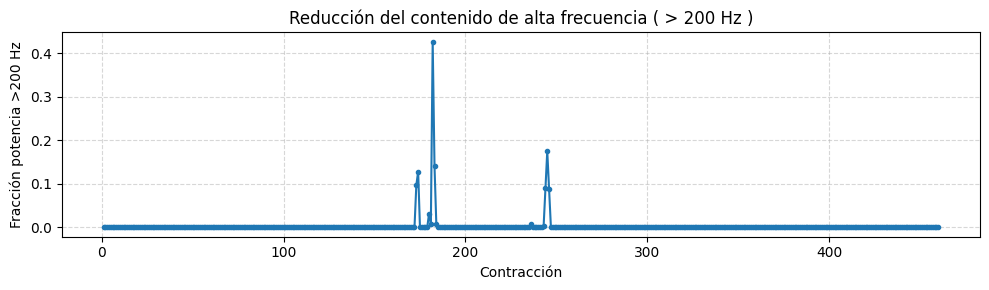

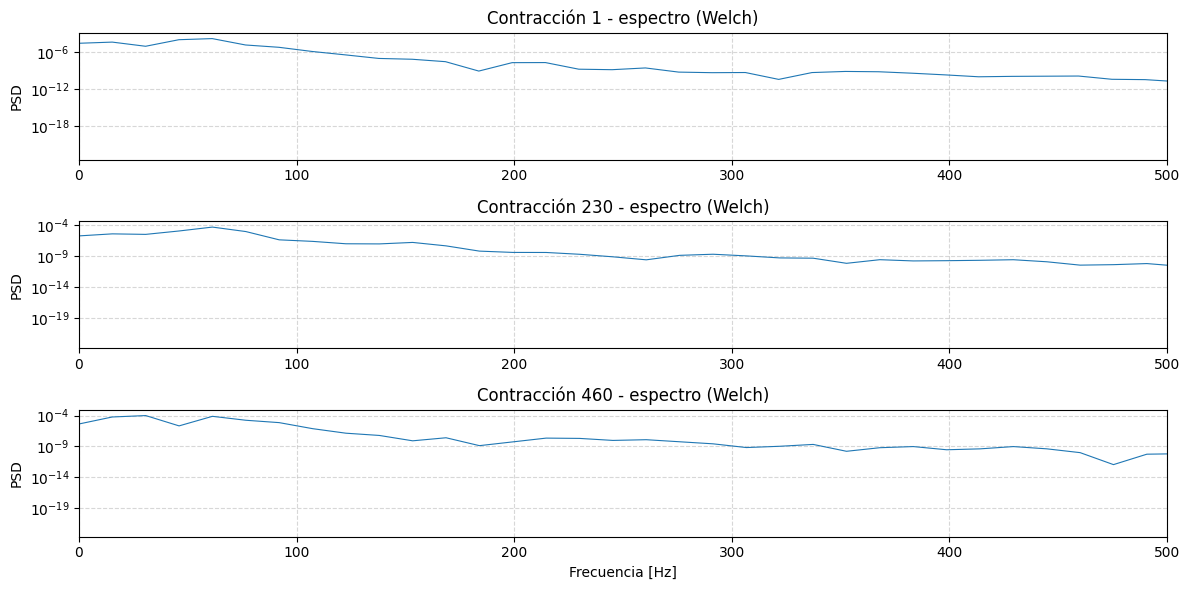

Resumen estadístico (frecuencia pico):
count    460.000000
mean      47.499650
std       14.324735
min       15.313936
25%       30.674847
50%       46.012270
75%       61.349693
max       76.687117
Name: Frecuencia_pico_Hz, dtype: float64

Frecuencia media promedio (primer 46 contr.): 48.44 Hz
Frecuencia media promedio (último 46 contr.): 46.98 Hz
Tendencia: disminución de la frecuencia media → indicativo de fatiga.


In [ ]:

from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt, welch


ruta = '/content/drive/MyDrive/GITTHUB/Captura_1_REAL.txt'

# 1) Cargar archivo
data = np.loadtxt(ruta, skiprows=1)
tiempo = data[:,0]
voltaje = data[:,1]
fs = 1.0 / np.mean(np.diff(tiempo))
print(f"Frecuencia de muestreo estimada: {fs:.1f} Hz")

# Tomar primeros 30 s
duracion = 30.0  # segundos
mask = tiempo <= duracion
tiempo_30 = tiempo[mask]
voltaje_30 = voltaje[mask]


lowcut, highcut, order = 20.0, 500.0, 4
b, a = butter(order, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
voltaje_filtrado = filtfilt(b, a, voltaje_30)


n_contr = 460
segmentos = np.array_split(voltaje_filtrado, n_contr)
tiempos_seg = np.array_split(tiempo_30, n_contr)
print(f"Segments: {len(segmentos)} (longitudes min/max = {min(len(s) for s in segmentos)} / {max(len(s) for s in segmentos)})")

resultados = []
for i, seg in enumerate(segmentos, start=1):
    if len(seg) < 4:
        # segmento demasiado corto, rellenar con NaN
        resultados.append([i, np.nan, np.nan, np.nan, np.nan])
        continue

    nperseg = min(1024, len(seg))
    f, Pxx = welch(seg, fs=fs, nperseg=nperseg)
    # frecuencia media (centroide)
    f_media = np.sum(f * Pxx) / np.sum(Pxx)
    # frecuencia mediana (50% de energía acumulada)
    energia_acum = np.cumsum(Pxx)
    idx_med = np.where(energia_acum >= energia_acum[-1]/2)[0]
    if idx_med.size == 0:
        f_med = np.nan
    else:
        f_med = f[idx_med[0]]
    # pico espectral (frecuencia de máxima magnitud)
    f_pico = f[np.argmax(Pxx)]
    # proporción de potencia en altas frecuencias (>200 Hz)
    mask_high = f > 200
    if np.sum(Pxx) > 0:
        ratio_high = np.sum(Pxx[mask_high]) / np.sum(Pxx)
    else:
        ratio_high = np.nan

    resultados.append([i, f_media, f_med, f_pico, ratio_high])

# Tabla con resultados
df_res = pd.DataFrame(resultados, columns=['Contracción','Frecuencia_media_Hz','Frecuencia_mediana_Hz','Frecuencia_pico_Hz','Ratio_potencia_>200Hz'])
display(df_res.head(10))
# Guardar CSV en Drive
out_path = '/content/drive/MyDrive/GITTHUB/resultados_fft_460.csv'
df_res.to_csv(out_path, index=False)
print("Resultados guardados en:", out_path)


plt.figure(figsize=(10,4))
plt.plot(df_res['Contracción'], df_res['Frecuencia_media_Hz'], '-o', markersize=3, label='Frecuencia media')
plt.plot(df_res['Contracción'], df_res['Frecuencia_mediana_Hz'], '-s', markersize=3, label='Frecuencia mediana')
plt.plot(df_res['Contracción'], df_res['Frecuencia_pico_Hz'], '-^', markersize=3, label='Frecuencia pico')
plt.xlabel('Contracción')
plt.ylabel('Frecuencia (Hz)')
plt.title('Evolución de frecuencias por contracción (460)')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,3))
plt.plot(df_res['Contracción'], df_res['Ratio_potencia_>200Hz'], '-o', markersize=3)
plt.xlabel('Contracción')
plt.ylabel('Fracción potencia >200 Hz')
plt.title('Reducción del contenido de alta frecuencia ( > 200 Hz )')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

indices_ejemplo = [1, int(n_contr/2), n_contr]
plt.figure(figsize=(12,6))
for idx, pos in enumerate(indices_ejemplo, start=1):
    seg = segmentos[pos-1]
    nperseg = min(1024, len(seg))
    f, Pxx = welch(seg, fs=fs, nperseg=nperseg)
    plt.subplot(3,1,idx)
    plt.semilogy(f, Pxx, linewidth=0.8)
    plt.xlim(0, 500)
    plt.ylabel('PSD')
    plt.title(f'Contracción {pos} - espectro (Welch)')
    plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.xlabel('Frecuencia [Hz]')
plt.tight_layout()
plt.show()


print("Resumen estadístico (frecuencia pico):")
print(df_res['Frecuencia_pico_Hz'].describe())


k = max(1, int(0.1 * n_contr))
prim_mean = np.nanmean(df_res['Frecuencia_media_Hz'][:k])
ult_mean = np.nanmean(df_res['Frecuencia_media_Hz'][-k:])
print(f"\nFrecuencia media promedio (primer {k} contr.): {prim_mean:.2f} Hz")
print(f"Frecuencia media promedio (último {k} contr.): {ult_mean:.2f} Hz")
if prim_mean > ult_mean:
    print("Tendencia: disminución de la frecuencia media → indicativo de fatiga.")
elif prim_mean < ult_mean:
    print("Tendencia: aumento de la frecuencia media.")
else:
    print("Tendencia: sin cambio claro en frecuencia media.")


PARTE C

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Frecuencia de muestreo estimada: 10000.00 Hz


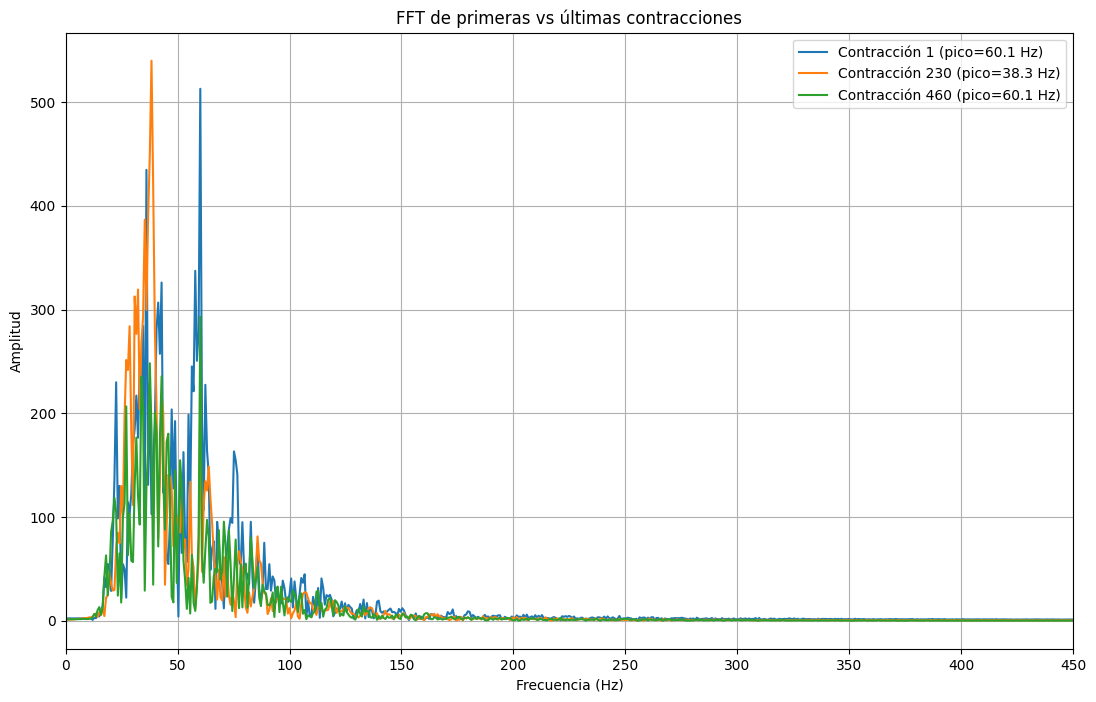

,Contracción,Pico espectral (Hz)
0,1,60.141332
1,2,39.091866
2,3,60.141332
3,4,38.340099
4,5,39.843633


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# 1. Cargar señal real desde Drive
ruta = '/content/drive/MyDrive/GITTHUB/Captura_1_REAL.txt'
data = np.loadtxt(ruta, skiprows=1)

tiempo = data[:, 0]
voltaje = data[:, 1]

# 2. Calcular frecuencia de muestreo
fs = 1 / np.mean(np.diff(tiempo))
print(f"Frecuencia de muestreo estimada: {fs:.2f} Hz")

# 3. Filtrado pasa banda (20–450 Hz)
lowcut, highcut, order = 20, 450, 4
b, a = butter(order, [lowcut/(fs/2), highcut/(fs/2)], btype='band')
voltaje_filtrado = filtfilt(b, a, voltaje)

# 4. Segmentar la señal
n_contr = 460
segmentos = np.array_split(voltaje_filtrado, n_contr)

# 5. FFT por contracción + Pico espectral
picos = []

plt.figure(figsize=(13, 8))
for i, seg in enumerate(segmentos, start=1):

    N = len(seg)
    fft_vals = np.fft.fft(seg)
    fft_freq = np.fft.fftfreq(N, 1/fs)

    mask = fft_freq > 0
    frecs = fft_freq[mask]
    amplitud = np.abs(fft_vals[mask])

    # Calcular pico espectral
    pico = frecs[np.argmax(amplitud)]
    picos.append(pico)

    # Graficar solo 3 contracciones: primera, media y última
    if i in [1, int(n_contr/2), n_contr]:
        plt.plot(frecs, amplitud, label=f"Contracción {i} (pico={pico:.1f} Hz)")

plt.xlim([0, 450])
plt.title("FFT de primeras vs últimas contracciones")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid()
plt.show()

# Tabla de picos para el informe
df_picos = pd.DataFrame({"Contracción": range(1, n_contr+1),
                         "Pico espectral (Hz)": picos})

display(df_picos.head())
